# Notebook 03
- EDA
- Estatística descritiva
- Estatística inferencial

# 0.0 Imports

In [1]:
import os
import datetime
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np

from dotenv               import load_dotenv
from IPython.core.display import HTML
from IPython.display      import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 0.1 Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [4]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Data loading

**Carregando os dados em que as lojas estavam abertas**

In [5]:
path_relative_data = 'interim'
path_data = os.path.join(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('.'))),'data'),path_relative_data)
file_data = 'data_02.csv'

df = pd.read_csv(os.path.join(path_data,file_data))

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df['date']=pd.to_datetime(df['date'])
df['promo_since']=pd.to_datetime(df['promo_since'])
df['competition_since']=pd.to_datetime(df['competition_since'])
#df['year_week']=pd.to_datetime(df['year_week'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   store                         844392 non-null  int64         
 1   day_of_week                   844392 non-null  int64         
 2   date                          844392 non-null  datetime64[ns]
 3   sales                         844392 non-null  int64         
 4   open                          844392 non-null  int64         
 5   promo                         844392 non-null  int64         
 6   state_holiday                 844392 non-null  object        
 7   school_holiday                844392 non-null  int64         
 8   store_type                    844392 non-null  object        
 9   assortment                    844392 non-null  object        
 10  competition_distance          844392 non-null  float64       
 11  competition_o

# 1.0 EDA - Exploratory Data Analysis

**Como as variáveis impactam o fenômeno? e qual a força desse impacto?** => Regra geral do EDA

In [9]:
df1 = df.copy()

In [10]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## 1.1 Análise univariada

### 1.1.1 Response variable

<AxesSubplot:xlabel='sales'>

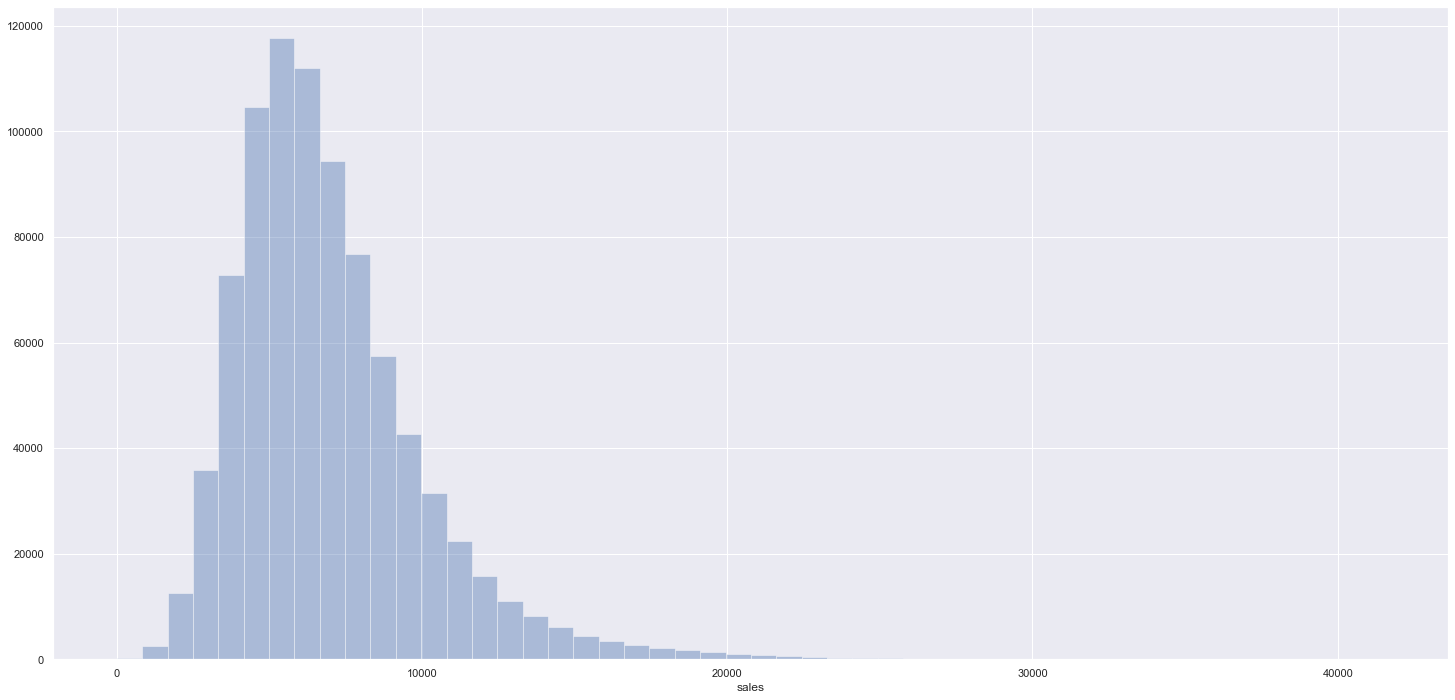

In [11]:
sns.distplot(df1['sales'], kde=False) # kde=True traça uma curva de densidade

Obs: A maioria dos algoritmos de ML foram performados com algumas condições, e uma delas, normalmente, é a curva de distribuição da variável target, de forma que quanto mais se aproxima de uma variável normal, melhor é o seu resultado.

Por isso, precisamos transformar a variável target de forma que corresponda a uma curva normal ou pelo menos tenha uma aparência semelhante.

Existem várias técnicas de transformação, como por exemplo o uso do log.

<AxesSubplot:xlabel='sales', ylabel='Density'>

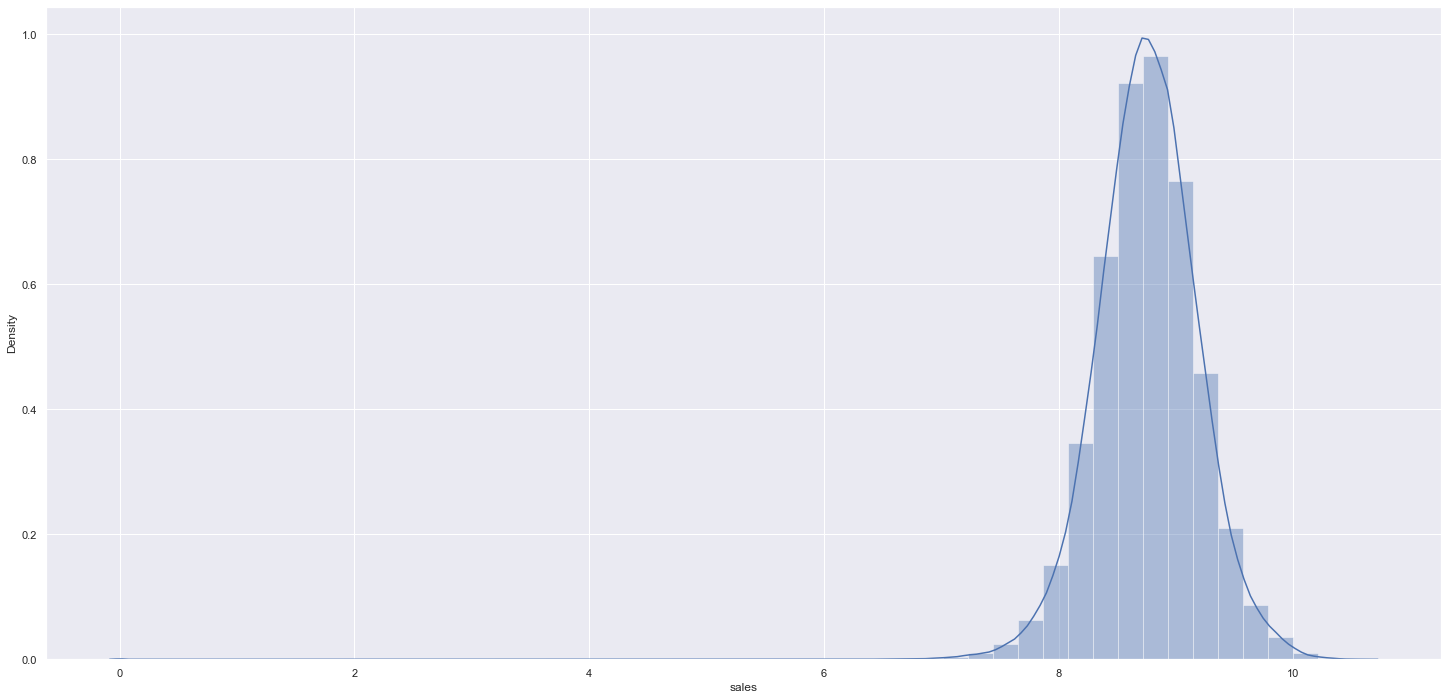

In [12]:
sns.distplot(np.log1p(df1['sales']))

### 1.1.2 Numerical variable

**Considerando somente eventos em que a loja estava aberta**

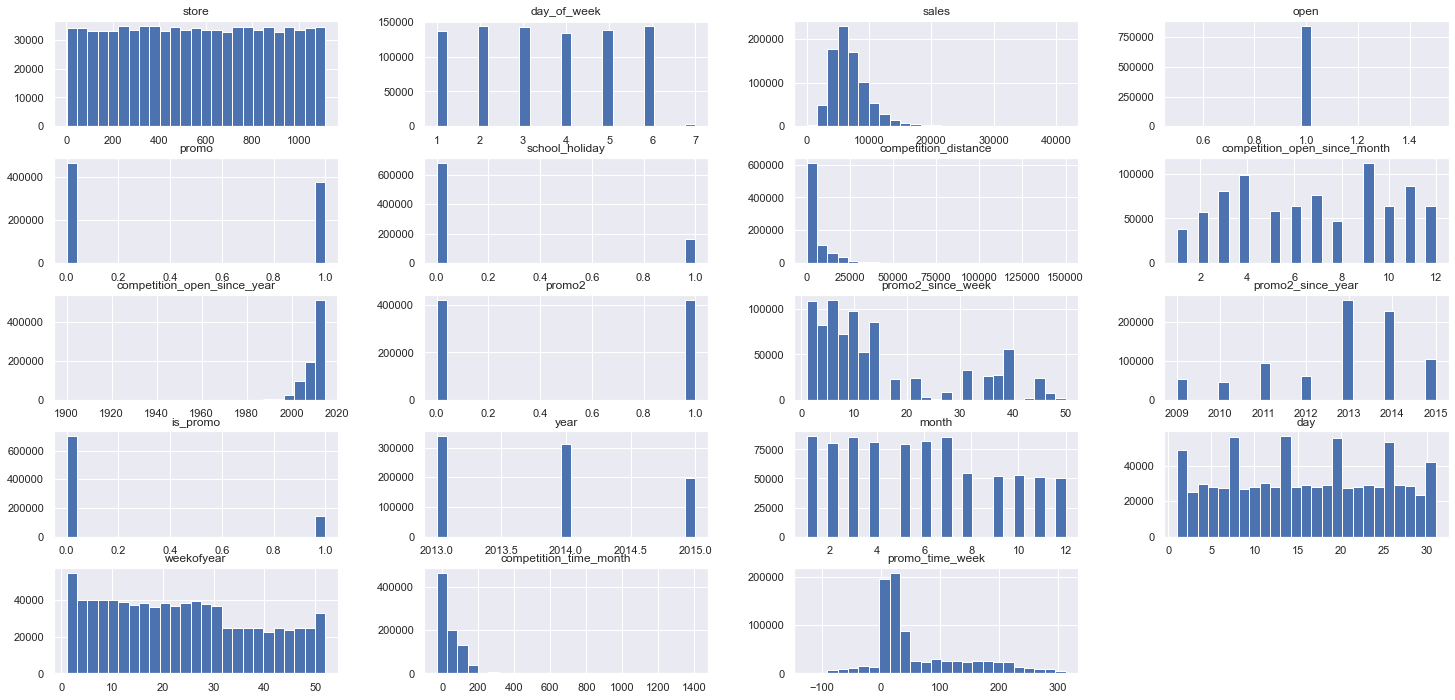

In [13]:
num_attributes.hist(bins=25);

**Lista de constatações:**
* As vendas tem uma menor frequência no domingo
* Tem mais vendas acontecendo quando não é tempo de promoção

### 1.1.1 Categorical variable

In [14]:
cat_attributes.columns

Index(['state_holiday', 'store_type', 'assortment', 'year_week'], dtype='object')

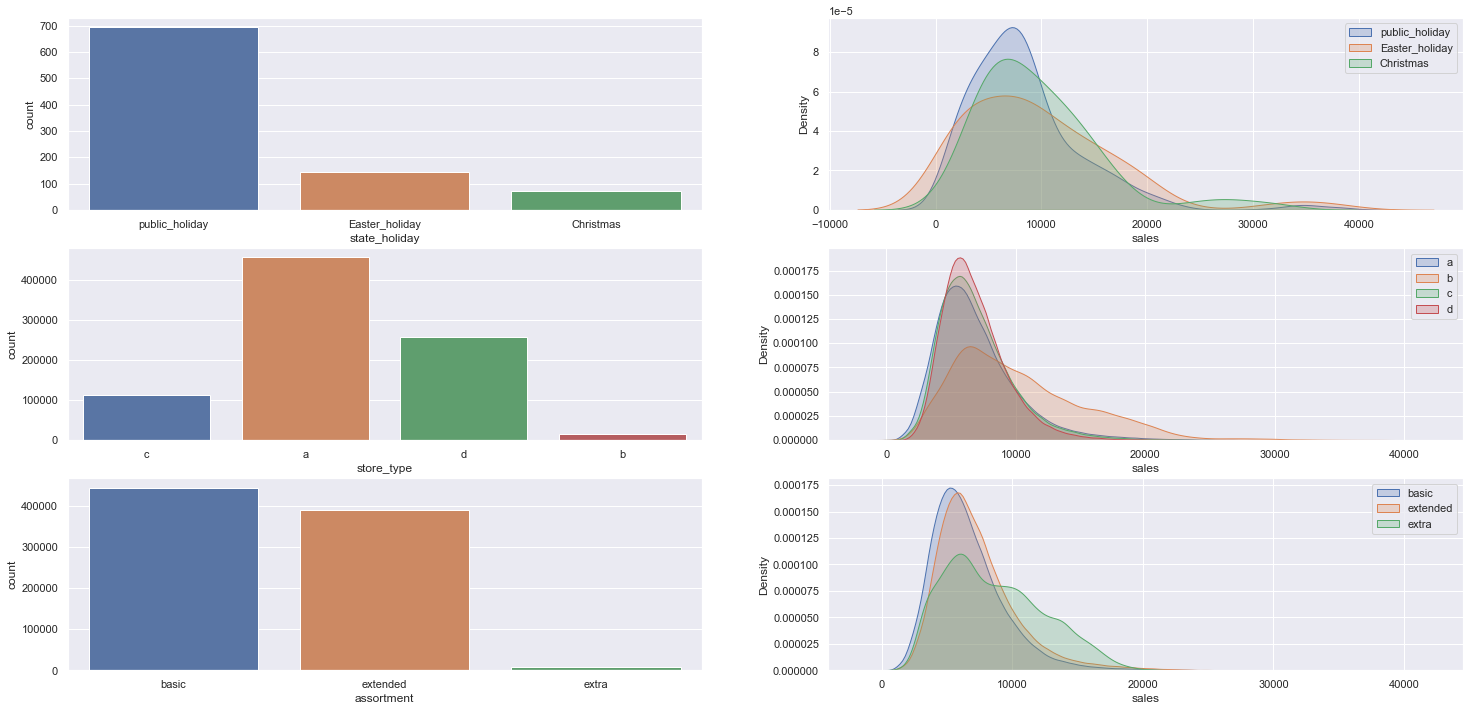

In [15]:
# Criar um grid com subplot

# State_holiday
plt.subplot(3,2,1)
a = df1[df1['state_holiday'] != 'Regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df1[df1['state_holiday'] == 'public_holiday']['sales'],  
            label = 'public_holiday', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)

sns.kdeplot(df1[df1['state_holiday'] == 'Easter_holiday']['sales'],  
            label = 'Easter_holiday', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['state_holiday'] == 'Christmas']['sales'],  
            label = 'Christmas', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)

plt.legend()
# Store_type
plt.subplot(3,2,3)
sns.countplot(df1['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df1[df1['store_type'] == 'a']['sales'],  
            label = 'a', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['store_type'] == 'b']['sales'],  
            label = 'b', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['store_type'] == 'c']['sales'],  
            label = 'c', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True) 

sns.kdeplot(df1[df1['store_type'] == 'd']['sales'],  
            label = 'd', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)
plt.legend()

# Assortment
plt.subplot(3,2,5)
sns.countplot(df1['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df1[df1['assortment'] == 'basic']['sales'],  
            label = 'basic', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['assortment'] == 'extended']['sales'],  
            label = 'extended', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['assortment'] == 'extra']['sales'],  
            label = 'extra', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True) 


plt.legend()


## 1.2 Análise bivariada

### H1. Lojas com maior sortimento deveriam vender mais.

**FALSA - Lojas com maior sortimento vendem MENOS**

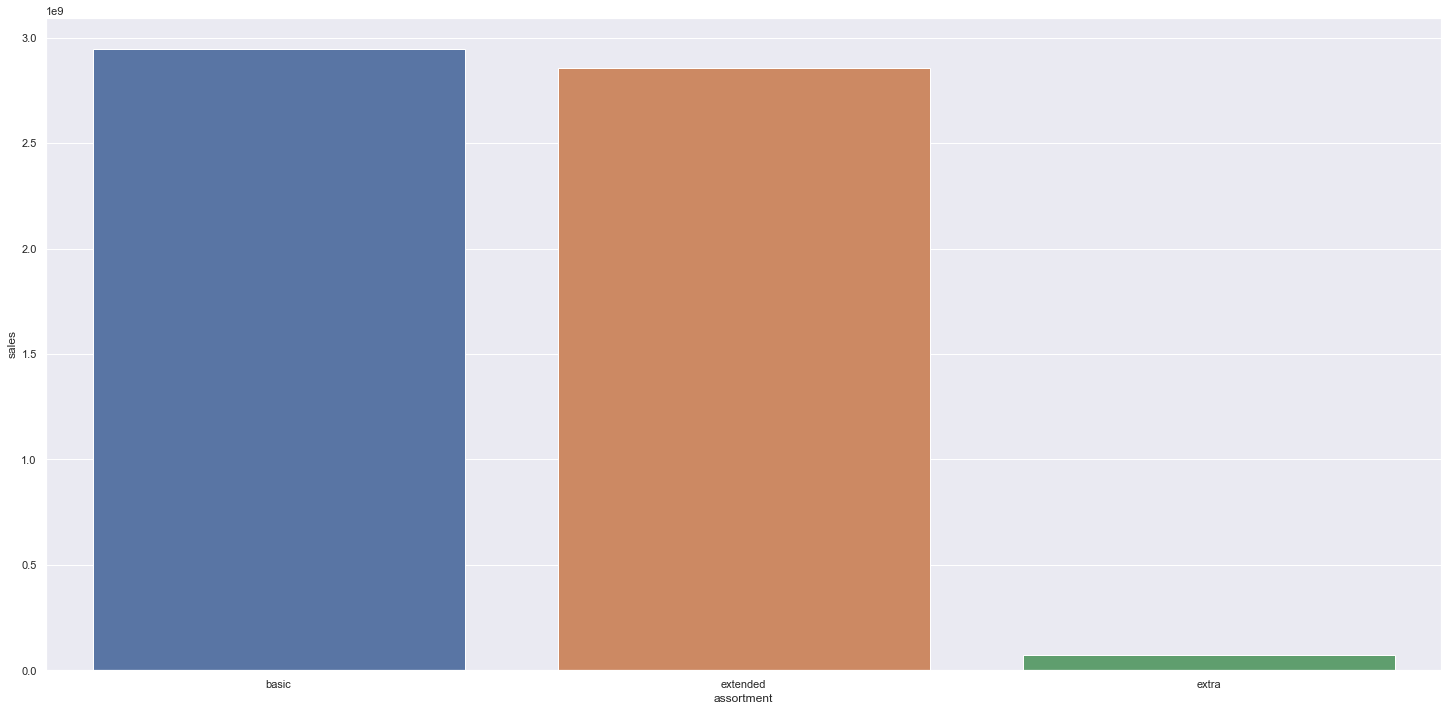

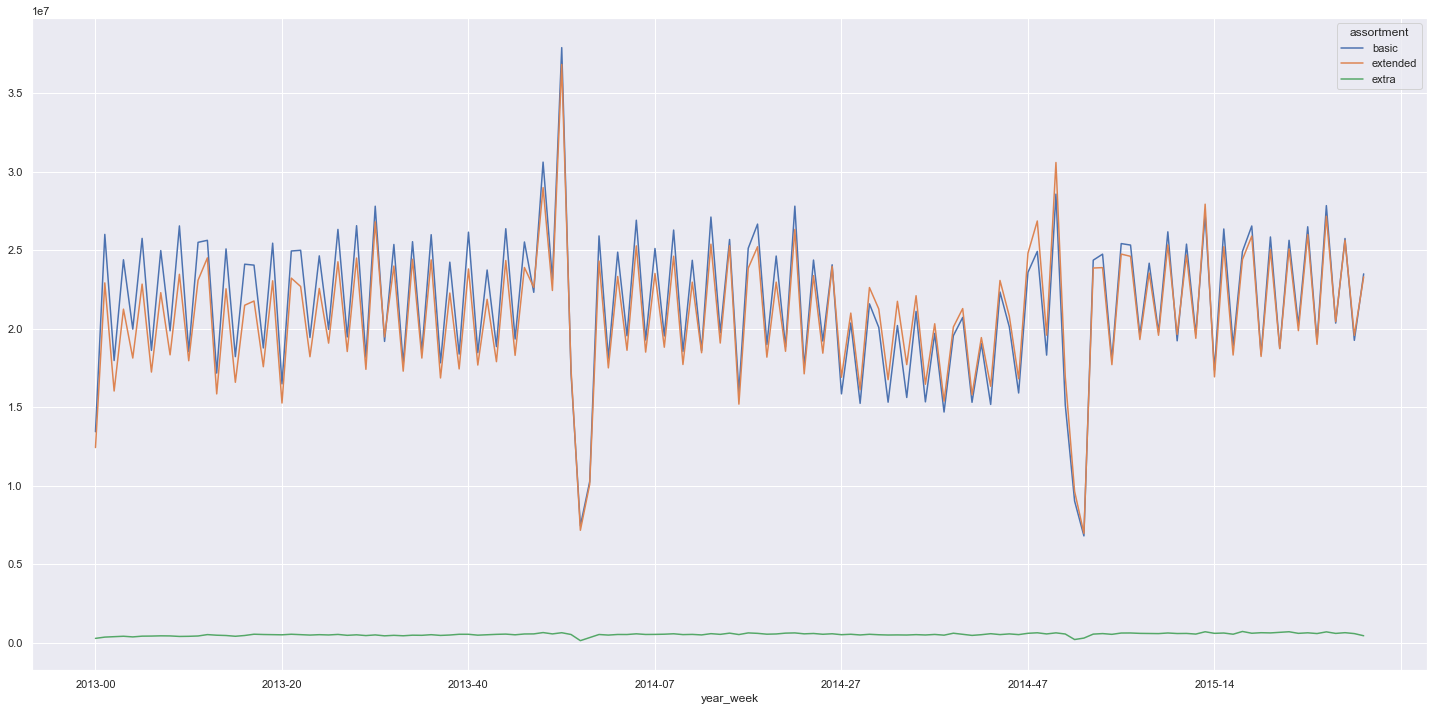

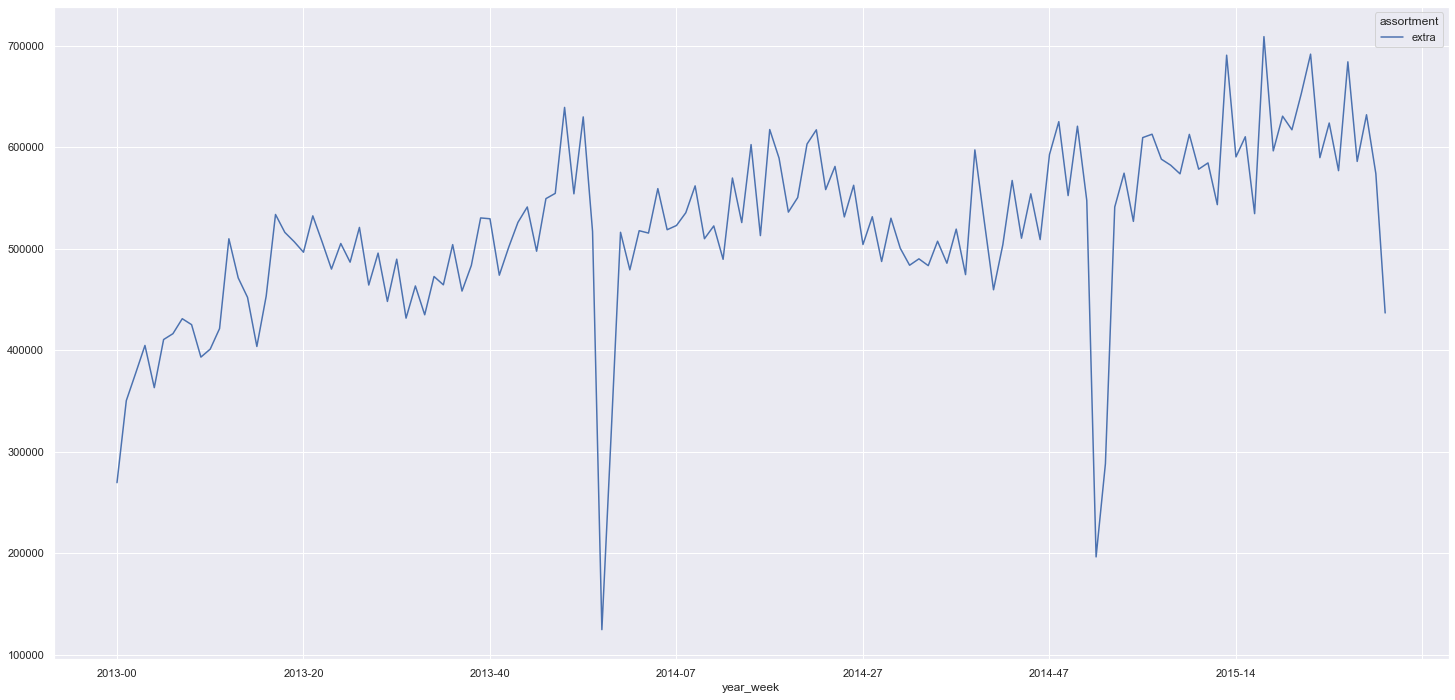

In [33]:
aux1 = df1[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales', data= aux1)

aux2 = df1[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot( index= 'year_week', columns= 'assortment', values= 'sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index= 'year_week', columns= 'assortment', values= 'sales').plot();


### H2. Lojas com competidores mais próximos deveriam vender menos.

**FALSA - Lojas com competidores mais próximos vendem mais.**

<AxesSubplot:>

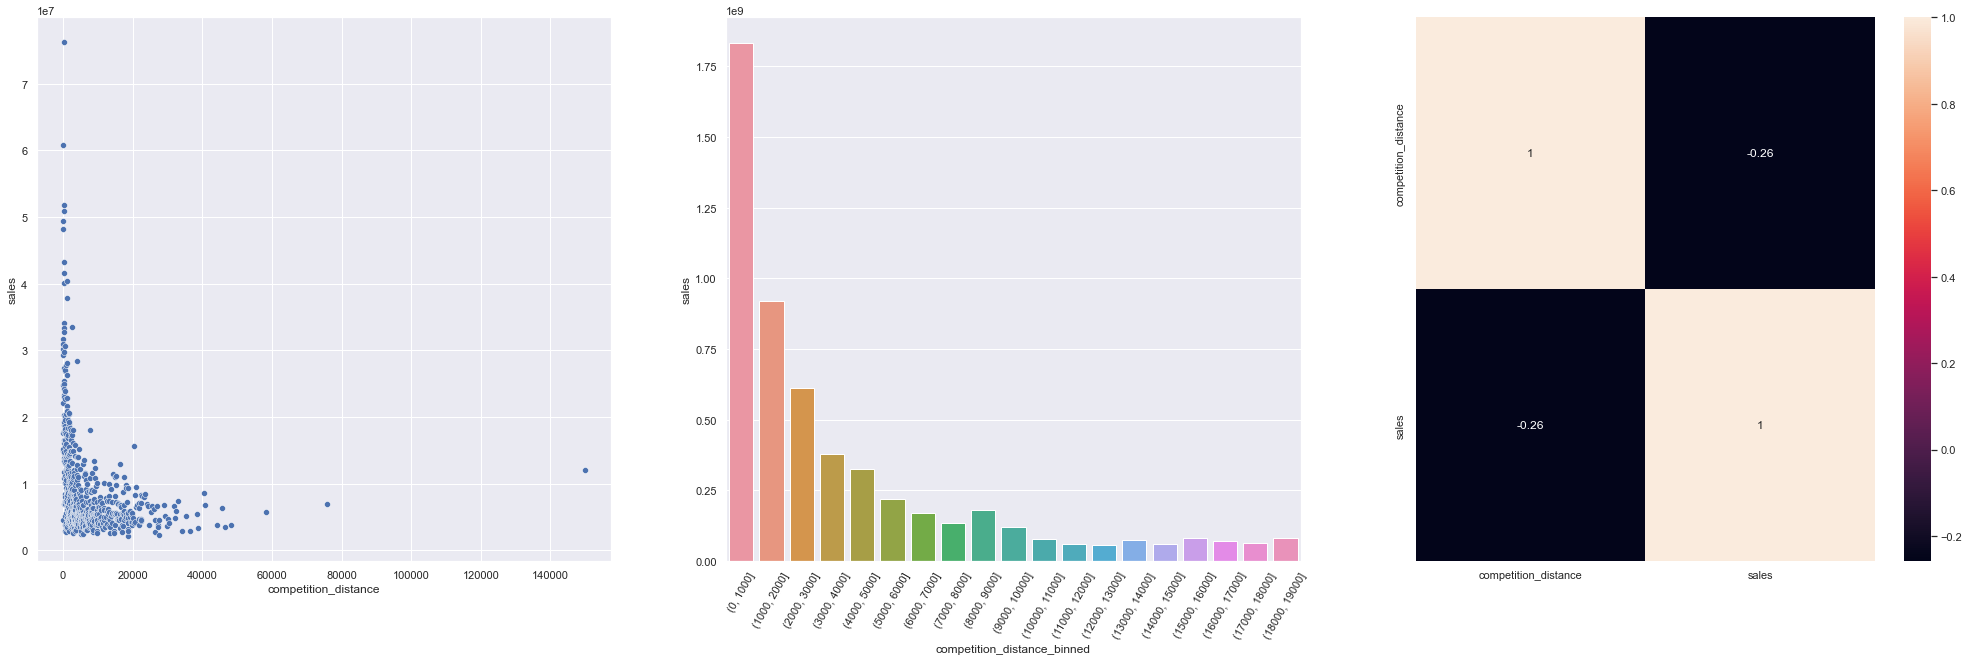

In [50]:
aux1 = df1[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.figure(figsize = [35,10])
plt.subplot(1,3,1)
# concentração dos dados
sns.scatterplot(x='competition_distance', y='sales', data=aux1);

# Criando grupo de valores para reproduzir o gráfico em barras
bins = list( np.arange (0,20000, 1000))

plt.subplot(1,3,2)
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y= 'sales', data=aux2)
plt.xticks(rotation = 60)

plt.subplot(1,3,3)
# Força de correlação entre a target e a variável competition Distance
sns.heatmap(aux1.corr(method = 'pearson'), annot=True)


### H3. Lojas com competidores à mais tempo deveriam vender mais.

**FALSA - Lojas competidores à mais tempo vendem menos que do que aqueles que competidores a menos tempo**

<AxesSubplot:>

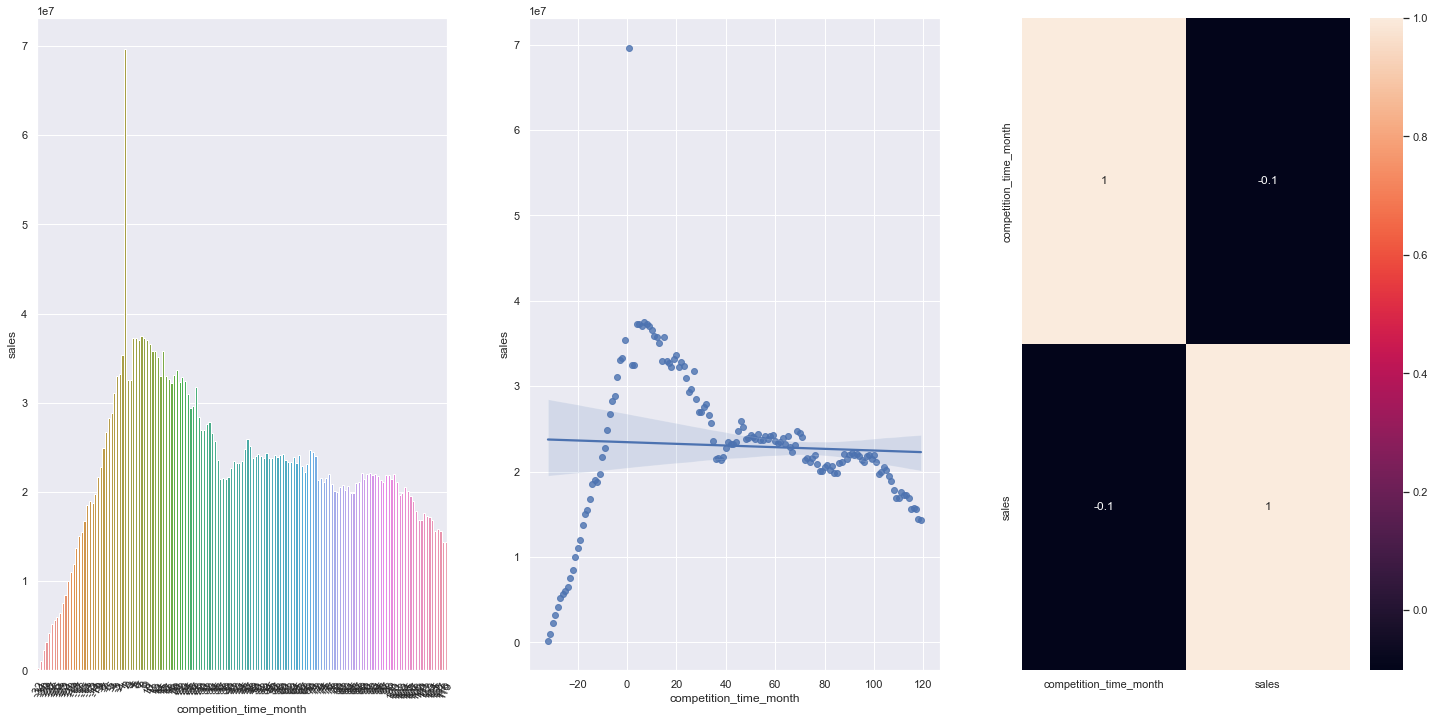

In [60]:
plt.subplot(1,3,1)
aux1 = df1[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month'] != 0 )]
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation = 60)


plt.subplot(1,3,2)
sns.regplot(x='competition_time_month' , y='sales', data=aux2)

# Verificando a relevância para o modelo
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot=True)


## 1.3 Análise multivariada